# 13 Long Short-Term Memory (LSTM) networks

LSTM networks stand as a powerful solution to one of the most persistent challenges in training recurrent neural networks (RNNs): the vanishing gradient problem.

In traditional RNNs, the gradients can become very small as they propagate back through time, which impedes the networks' ability to capture long-range dependencies in sequential data. LSTMs address this issue with an ingenious architectural design that includes specialized memory cells and gating mechanisms. Each LSTM cell possesses the ability to remember or forget information over extended sequences, rendering them particularly adept at modeling sequences with extended gaps between relevant information.

The core of the LSTM architecture is its three gating mechanisms: the input gate, the forget gate, and the output gate. These gates allow LSTMs to determine what information to store, what information to discard, and how to update the cell's memory state. This unique design empowers LSTMs to effectively learn and maintain long-term dependencies in sequential data, making them a preferred choice for tasks such as machine translation, speech recognition, and sentiment analysis where capturing context over extended sequences is essential.

### Architecture of LSTM Networks

The LSTM (Long Short-Term Memory) unit, a type of recurrent neural network (RNN) cell, was designed specifically to overcome the vanishing and exploding gradient problems encountered when training traditional RNNs. The LSTM does this by introducing a more complex cell structure than the standard RNN cell.

Here's a breakdown of the main components of an LSTM cell:
##### 1. Memory Cell (or Cell State):

Nature: The memory cell, often represented by $C$, runs along the top of the LSTM cell diagrams and can be thought of as the "conveyor belt" of the LSTM unit. It carries information that might be needed later, ensuring that it's available for future time steps.

Role: The memory cell stores and maintains temporal information. It undergoes controlled modifications as data flows through the LSTM cell, preserving important historical context.

##### 2. Forget Gate:

Nature: It's a sigmoid layer that takes the previous hidden state ($h_{t−1}$) and the current input ($x_t$).

Role: The forget gate decides which information from the memory cell should be thrown away or kept. The output of the sigmoid layer is between 0 and 1. A value close to 0 implies "forget", while a value close to 1 implies "retain".
    
Mathematically, the forget gate can be represented as: $ft=σ(Wf⋅[h_{t−1},x_t]+b_f)$
Where $W_f$ and $b_f$ are the weight matrix and bias for the forget gate, respectively.

##### 3. Input Gate:

Nature: The input gate consists of two parts:
1. A sigmoid layer that decides which values to update.
2.	A tanh layer that creates a vector of new candidate values.

Role: The input gate is responsible for deciding which information is worth storing in the memory cell.
1.	The sigmoid layer outputs values between 0 and 1, indicating how much of each part of the new candidate values should be added to the cell state.
    $i_t=σ(W_i⋅[h_{t−1},x_t]+b_i)$
    Where $W_i$ and $b_i$ are the weight matrix and bias for the input gate, respectively.
2.	The tanh layer generates potential values (new information) to be added to the cell state.
    $C_t=tanh(W_C⋅[h_{t−1},x_t]+b_C)$
    Where $W_C$ and $b_C$ are the weight matrix and bias for generating new candidate values.
    
##### 4. Output Gate:
Nature: The output gate also has two parts:
1.	A sigmoid layer that decides which parts of the cell state are going to be output.
2.	The memory cell's state passed through a tanh function, which is then multiplied by the sigmoid gate's output.

Role: The output gate determines what information from the memory cell is used in the output. The output will be based on the cell state but in a filtered form.
The gate is defined as: $o_t=σ(Wo⋅[h_{t−1},x_t]+b_o)$
And the final output is: $h_t=o_t×tanh(C_t)$
Where $W_o$ and bobo are the weight matrix and bias for the output gate, respectively, and $C_t$ is the current cell state.

#### Summary
To put everything together, the LSTM cell's operations can be summarized as:
1.	Decide what information to forget (Forget Gate).
2.	Decide what new information to store (Input Gate).
3.	Update the cell state by combining the decisions from the above two steps.
4.	Decide what part of the cell state to output (Output Gate).

This architecture allows LSTMs to remember information over long sequences and is particularly effective for tasks where the gap between the relevant information and the point where it's needed is large.


![LSTM unit](../data/rnn-vs-lstm.png)

### Exercise

Build an LSTM network to predict stock prices based on historical stock data. Show the model's ability to capture sequential dependencies.

In [26]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

Data Preparation:
* Divide the dataset into training and testing sets.
* Normalize the data to ensure that all features are within a similar scale.

In [27]:
# Fetch historical stock data using yfinance
stock_symbol = "NDAQ"
start_date = "2010-01-01"
end_date = "2023-08-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the 'Close' prices
stock_prices = stock_data["Close"].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(stock_prices)

# Split data into training and testing sets
train_size = int(0.8 * len(normalized_prices))
train_data, test_data = normalized_prices[:train_size], normalized_prices[train_size:]

Model Architecture:
* Create an LSTM model architecture. The architecture should include one or more LSTM layers, followed by one or more Dense layers for regression.
* Explain the concept of input sequences and time steps, as well as how to reshape the data to fit the LSTM input format.

In [28]:
# Define a function to reshape data for LSTM input
def create_lstm_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i : i + look_back])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# Set the look-back window for creating input sequences
look_back = 30

Model Training:
* Train the LSTM model using the training data. Explain the importance of setting appropriate hyperparameters, such as batch size and number of epochs.
* Monitor the training progress by plotting loss curves and observing how the model's performance changes over epochs.


In [29]:
# Create training and testing datasets
trainX, trainY = create_lstm_dataset(train_data, look_back)
testX, testY = create_lstm_dataset(test_data, look_back)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))

# Train the model
batch_size = 64
epochs = 100
history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
38/38 [==============================] - 4s 40ms/step - loss: 0.0083 - val_loss: 7.4236e-04
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 1.8420e-04 - val_loss: 7.9185e-04
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 8.0803e-05 - val_loss: 7.7332e-04
Epoch 4/100
38/38 [==============================] - 1s 19ms/step - loss: 7.4509e-05 - val_loss: 7.1600e-04
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 7.1304e-05 - val_loss: 7.0226e-04
Epoch 6/100
38/38 [==============================] - 1s 18ms/step - loss: 6.7373e-05 - val_loss: 6.9247e-04
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 6.5869e-05 - val_loss: 7.4032e-04
Epoch 8/100
38/38 [==============================] - 1s 17ms/step - loss: 6.4946e-05 - val_loss: 7.4432e-04
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 6.4005e-05 - val_loss: 6.7158e-04
Epoch 10/100
38/38 [============

Model Evaluation:
* Use the trained model to make predictions on the testing data.
* Evaluate the model's performance using appropriate metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

In [30]:
# Evaluate the model
train_predictions = model.predict(trainX)
test_predictions = model.predict(testX)

train_rmse = np.sqrt(mean_squared_error(trainY, train_predictions))
test_rmse = np.sqrt(mean_squared_error(testY, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

21/21 [==============================] - 0s 6ms/step
Train RMSE: 0.0068101641032285104
Test RMSE: 0.021832119012062865


Visualization:
* Plot the true stock prices and the predicted stock prices over time to visually assess the model's predictions.

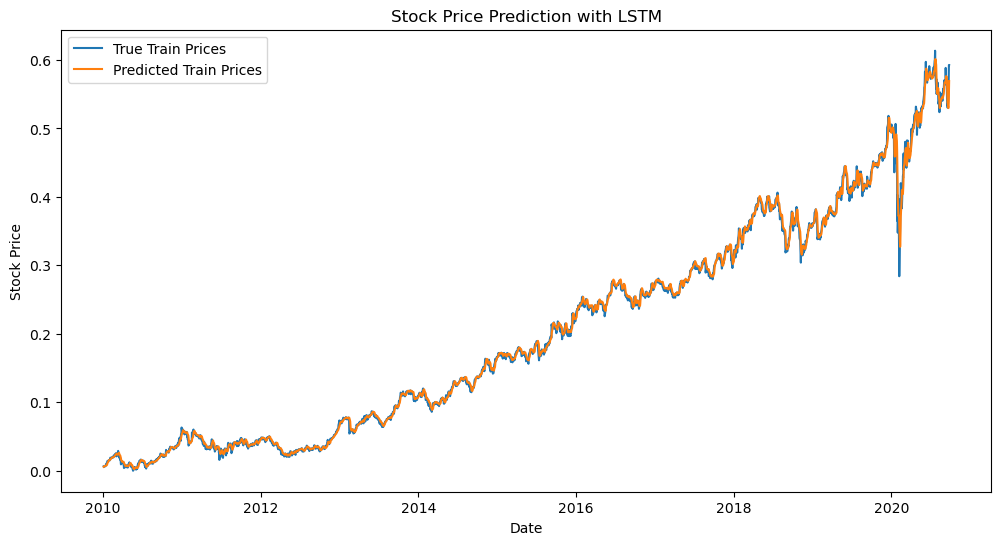

In [31]:
# Plot predictions
test_true = testY

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[:len(trainY)], trainY, label="True Train Prices")
plt.plot(stock_data.index[:len(trainY)], train_predictions, label="Predicted Train Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with LSTM")
plt.legend()
plt.show()

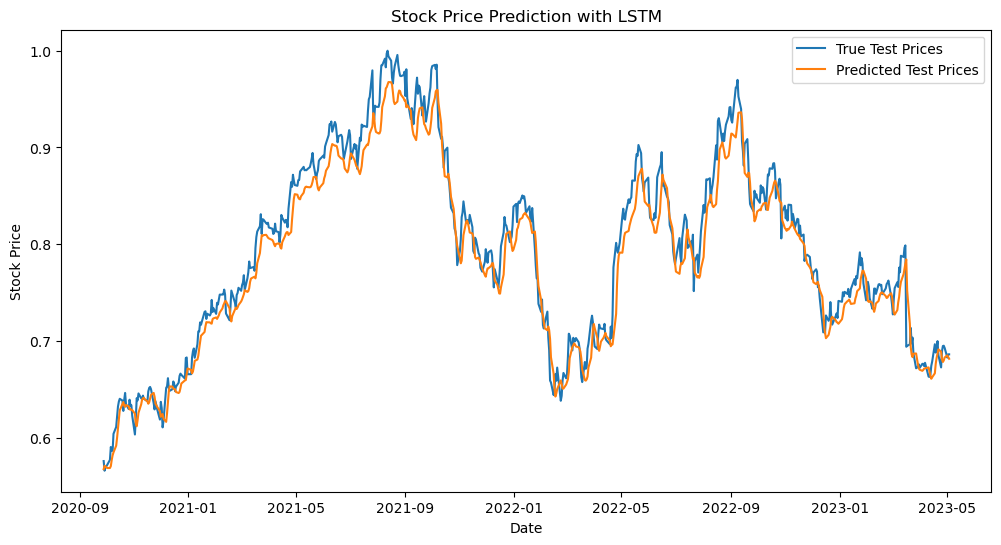

In [32]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[len(trainY):len(trainY)+len(testY)], testY, label="True Test Prices")
plt.plot(stock_data.index[len(trainY):len(trainY)+len(testY)], test_predictions, label="Predicted Test Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with LSTM")
plt.legend()
plt.show()